# Machine Learning Based

## Logistic Regression- Multiple Classification Project


## Introduction

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01) database, which was built from the recordings of study participants who carried a smartphone with an embedded inertial sensor while performing activities of daily living (ADL). The objective is to classify the activities the participants performed into one of the six following categories: walking, walking upstairs, walking downstairs, sitting, standing, and laying.

The following information is provided for each record in the dataset:

*   Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration
*   Triaxial Angular velocity from the gyroscope
*   A 561-feature vector with time and frequency domain variables
*   The activity label

More information about the features are available on the website linked above.


In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import seaborn as sns, pandas as pd, numpy as np

# Importing DataSet

Import the data and do the following:

*   Examine the data types--there are many columns, so it might be wise to use value counts.
*   Determine if the floating point values need to be scaled.
*   Determine the breakdown of each activity.
*   Encode the activity label as an integer.


In [3]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/Human_Activity_Recognition_Using_Smartphones_Data.csv", sep=',')

In [6]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


The data columns are all floats except for the activity label.


In [7]:
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [8]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

The data are all scaled from -1 (minimum) to 1.0 (maximum).


In [10]:
data.iloc[:, :-1].min().value_counts() # x set (features)

-1.0    561
dtype: int64

In [9]:
data.iloc[:, :-1].max().value_counts()

1.0    561
dtype: int64

Examine the breakdown of activities; they are relatively balanced.


In [11]:
data.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

Scikit learn classifiers won't accept a sparse matrix for the prediction column. Thus, either `LabelEncoder` needs to be used to convert the activity labels to integers, or if `DictVectorizer` is used, the resulting matrix must be converted to a non-sparse array.\
Use `LabelEncoder` to fit_transform the "Activity" column, and look at 5 random values.


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)
### END SOLUTION

1004    2
3218    5
6941    4
7960    5
7980    2
Name: Activity, dtype: int32

## Train test split using StatifiedShuffleSplit

*   Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
*   Regardless of the method used to split the data, compare the ratio of classes in both the train and test splits.


In [14]:
### BEGIN SOLUTION
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
feature_cols = data.columns[:-1]
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))  # strat_shuf_split.split() gives a generator object, the next operator gives the array for train test split indices 

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']

In [16]:
y_train.value_counts(normalize=True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [17]:
y_test.value_counts(normalize=True)
### END SOLUTION

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

## Fitting the train set

*   Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.
*   Using cross validation to determine the hyperparameters and fit models using L1 and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.


In [18]:
### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train) # liblinear - one value of activity at a time, so runs 6 times

In [19]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [20]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)
### END SOLUTION



*   Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately.


In [22]:
### BEGIN SOLUTION
# Combine all the coefficients into a dataframe
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], 
                                 codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

lr                                                          l1  \
            0         1         2         3         4         5         0   
451 -0.118887  2.071692 -2.240813  0.160777 -0.834990 -0.062779  0.000000   
409 -0.024896 -0.085499  0.157396  0.559188  0.274806 -0.329467  0.000000   
46   0.175420  0.201696  0.449560  0.215527 -0.405236 -0.086071  0.000000   
292  0.175566  0.147579 -0.047788  0.054523  0.262426 -0.285642  0.000000   
430 -0.021036 -0.267203  0.085698  0.351227 -0.137153 -0.233154  0.000000   
209 -0.011478 -0.071676  0.263292  0.407067 -0.504332 -0.386499  0.000000   
177 -0.004036  0.192079  0.170310 -0.113047  0.112307  0.112653 -0.001458   
346 -0.032972  0.037211 -0.281141  0.013215  0.339058 -0.587200  0.000000   
196  0.027976 -0.674878  0.860993 -0.107624 -0.268263  0.236405  0.000000   
74  -0.103817 -0.227167  0.241250 -0.309442 -0.179884  0.319094  0.000000   

                                                             l2            \
            1         2         3         4         5         0         1   
451  1.320100 -1.901711  0.420249 -3.073727  0.238339 -0.179153  1.414059   
409  0.000000  0.000000  0.511342  0.127510 -0.539566 -0.054364 -0.238766   
46   0.026598  1.054605  0.184097 -0.227740 -0.142330  0.291733  0.187185   
292  0.017939  0.150894  0.000000  0.123629 -0.033672  0.351957 -0.218092   
430  0.000000  0.000000  0.373675 -0.004313 -0.257865 -0.034144 -1.109446   
209  0.000000  0.015698  0.574352 -1.162780 -3.691239  0.004063 -0.177596   
177  0.000000  0.000000  0.000000  0.040842 -0.004031 -0.028281  0.497251   
346  0.000000  0.000000  0.001466  0.991536 -0.403774 -0.058595  0.477237   
196 -1.338752  1.464494  0.000000 -0.234219 -1.508492 -0.016579 -1.689068   
74   0.000000  0.000000 -0.377018 -0.173454  0.634562 -0.194274 -1.316877   

                                             
            2         3         4         5  
451 -2.005093  0.267744 -1.776301  0.166301  
409  0.505037  1.607292  0.622559 -2.192945  
46   2.314394  0.675336 -0.925244 -1.126367  
292  0.369973  0.449929  0.282848 -0.889341  
430  0.756690  0.829419 -0.268370 -1.158795  
209  0.588299  0.953496 -0.768270 -1.719473  
177  0.159177 -0.358619  0.079411  0.727078  
346 -1.201414 -0.096073  0.667339 -2.358603  
196  2.284328 -0.231219 -0.341934  0.599117  
74   0.880139 -0.765818 -0.201119  0.340584

Prepare six separate plots for each of the multi-class coefficients.




*   Predict and store the class for each model.
*   Store the probability for the predicted class for each model.


In [23]:
### BEGIN SOLUTION
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
#     y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))  # gives just the probability, and class(0-5) has to be tracked from the prediction colunm 
    y_prob.append(pd.DataFrame(mod.predict_proba(X_test), columns=coeff_label))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0


In [24]:
y_prob.head()
### END SOLUTION

l2                                                                    \
          0             1             2             3         4             5   
0  0.000034  1.683457e-04  5.675968e-04  9.989388e-01  0.000006  2.845351e-04   
1  0.000037  3.211711e-07  4.237865e-06  1.424779e-04  0.011650  9.881654e-01   
2  0.000036  4.352764e-03  2.962603e-06  9.875917e-01  0.005011  3.006537e-03   
3  0.000223  9.813812e-01  1.838389e-02  1.419839e-07  0.000012  1.288315e-12   
4  0.998277  1.717715e-03  3.008377e-09  2.088934e-07  0.000005  1.393959e-10   

                                                                     \
          0             1             2             3             4   
0  0.000006  5.864786e-06  1.085066e-03  9.989035e-01  4.864316e-10   
1  0.000006  1.099394e-08  1.058247e-07  5.840003e-07  4.071917e-04   
2  0.000001  3.648909e-03  2.290814e-07  9.954577e-01  8.916519e-04   
3  0.000004  9.991983e-01  7.979942e-04  3.325149e-14  6.668694e-10   
4  0.999921  7.926803e-05  2.813556e-14  2.274768e-13  1.250322e-10   

                                                                         \
              5             0             1             2             3   
0  1.231881e-09  1.236823e-07  1.979939e-08  2.312070e-06  9.999975e-01   
1  9.995862e-01  2.671103e-07  5.230459e-14  3.237063e-12  1.038200e-09   
2  1.614350e-07  1.838199e-07  6.789225e-05  8.462633e-12  9.996967e-01   
3  8.696658e-29  1.322405e-07  9.998647e-01  1.351713e-04  9.000201e-17   
4  9.662813e-25  9.999973e-01  2.666167e-06  9.843973e-22  9.889195e-16   

                               
              4             5  
0  3.829115e-09  3.607216e-12  
1  5.224579e-04  9.994773e-01  
2  2.352370e-04  2.274678e-09  
3  2.218581e-09  1.013162e-38  
4  1.708532e-09  2.981961e-34


For each model, calculate the following error metrics:

*   Accuracy
*   Precision
*   Recall
*   F-score
*   Confusion Matrix

Decide how to combine the multi-class metrics into a single value for each model.


In [25]:
### BEGIN SOLUTION
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [26]:
metrics
### END SOLUTION

,lr,l1,l2
precision,0.984144,0.983835,0.984477
recall,0.984142,0.983819,0.984466
fscore,0.984143,0.983815,0.984464
accuracy,0.984142,0.983819,0.984466
auc,0.990384,0.990144,0.990553




*   Display or plot the confusion matrix for each model.


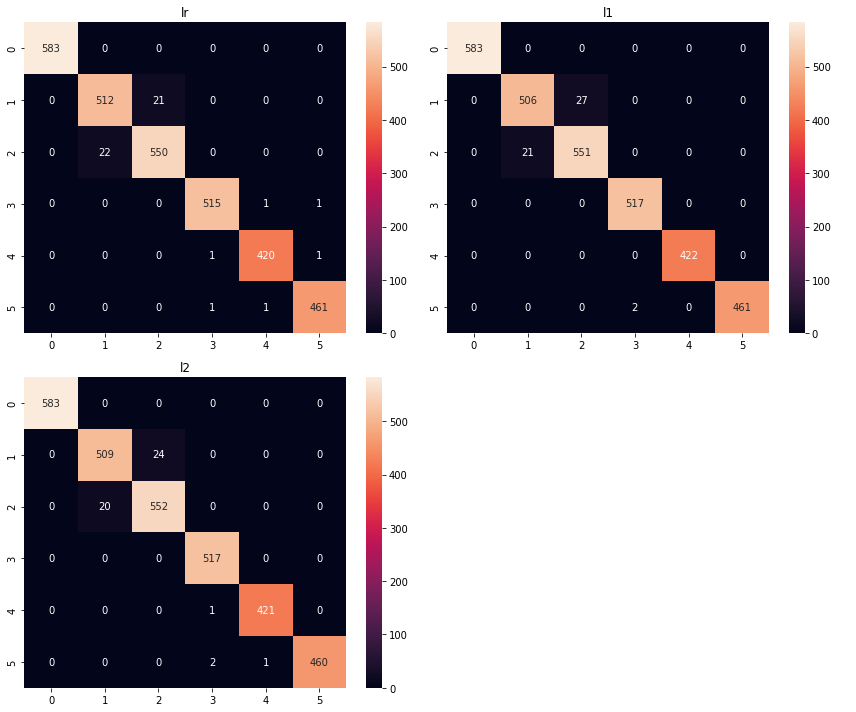

In [28]:
### BEGIN SOLUTION
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()
### END SOLUTION

***

### Machine Learning Foundation (C) 2020 IBM Corporation
